# COGS 108 - Final Project

# Overview
The 2020 US election is a big topic across the world. Judging from the data on election day, the competition between Donald Trump and Joe Biden is very fierce. For our project, we decided to use natural language processing (NLP) in order to compare the sentiments of user tweets under the Trump and #Biden hashtags on Twitter. To do this, we first filter all the data in the dataset by the country/region where Twitter users are located to analyze all US Twitter users. After ignoring capital letters and removing the punctuation of each tweet, we tokenize these tweets as individual word sets and delete all stop words in each set to prepare for our sentiment analysis. From this analysis, we found a positive correlation between people’s negative sentiment towards the COVID-19 pandemic and people’s negative opinion towards political candidates.

# Names

- Yichen Huang
- Hong Tang
- Rita Wan
- Chaolun Cai
- Angie Long

# Research Question

- What are the sentiment of Trump followers and Biden followers based on the tweets under the #Trump and #Tiden hashtags? Does the overall sentiment of these two groups of people has significant difference?
- Does the negative sentiment of Covid-19 affects the overall reputation of two president candidates?

# Background and Prior Work

The 2020 US election on the 3rd November 2020 will undoubtedly result in an impact on the world. With increasing globalization and the increased use of social media,  Twitter provided a platform for people to find the latest information about the election, express their feelings about the candidates, and feel informed about their choices, which has never been so important as during this global pandemic (1). Twitter users are more likely to receive information they are interested in based on the accounts and topics they follow, with more than 5000 topics available (2). We are able to understand the public opinion regarding political candidates and political parties based on the sentiment in the Tweets.

<br>
One research study on Twitter data regarding the 2020 election has shown a potential shortcoming of the Twitter data. The datasets collected are not well distributed in a way that states like Florida, California, Texas have more data than others. 
Also, the amount of data related to Trump exceeds Biden and this happens for our datasets as well (3). In another study that studies the negative sentiment of the UK general elections in 2017, keywords and location information are used to analyze the trends in sentiment towards political candidates. The study has found that there’s a correlation between the sentiment tendencies of public opinion, and this is reflected in the UK general election (4). 
<br>

Our project also tends to study how negative sentiments to the pandemic by the current administration influence people’s behaviors on Twitter and how closely these tendencies correlate with the final election results. 

## Reference
1)https://help.twitter.com/en/using-twitter/us-elections
<br>
2)https://blog.twitter.com/en_us/topics/company/2020/2020-election-update.html
<br>
3)https://towardsdatascience.com/sentiment-analysis-on-twitter-data-regarding-2020-us-elections-1de4bedbe866
<br>
4)https://dl.acm.org/doi/fullHtml/10.1145/3339909

# Hypothesis
The sentiment analysis of tweets with `#Trump` hashtag has a significant difference compared to the tweets with `#Biden` hashtag.

# Dataset(s)
Dateset 1:
- Dataset Name: hashtag_donaldtrump.csv
<br>
- Links: https://www.kaggle.com/manchunhui/us-election-2020-tweets?select=hashtag_donaldtrump.csv
<br>
- Number of observations: 970919
<br>
- Description: This dataset captures the tweets with Trump’s hashtags form 10/15/2020 to 11/08/2020. It contains information about the dates of the tweets, information about the users, and the contents of the tweets. For our analysis, we specifically used tweets (text body of the tweets) and geographical information (country, state code).

Dataset 2:
- Dataset Name: hashtag_joebiden.csv
<br>
- Links: https://www.kaggle.com/manchunhui/us-election-2020-tweets?select=hashtag_joebiden.csv
<br>
- Number of observations: 776886
<br>
- Description: This dataset captures tweets with Biden’s hashtags form 10/15/2020 to 11/08/2020. It contains information about the dates of the tweets, information about the users, and the contents of the tweets. For our analysis, we specifically used tweets (text body of the tweets) and geographical information (country, state code).

# Data Analysis

## Set up

In [1]:
import pandas as pd
import numpy as np

import nltk
# import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.probability import FreqDist
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer 

#!pip install wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind,ttest_rel
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support



In [2]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/yih023/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yih023/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yih023/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Overview of Data

We first read all data from these two datasets.
<br>
We use `trump_df` to represent the dataset that contains a `#Trump` hashtag, and `biden_df` for `#Biden` hashtag.

In [3]:
trump_df = pd.read_csv("hashtag_donaldtrump.csv",
                 lineterminator='\n')

biden_df = pd.read_csv("hashtag_joebiden.csv",
                 lineterminator='\n')

In [4]:
(trump_df.shape, trump_df.columns)

((970919, 21),
 Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
        'user_id', 'user_name', 'user_screen_name', 'user_description',
        'user_join_date', 'user_followers_count', 'user_location', 'lat',
        'long', 'city', 'country', 'continent', 'state', 'state_code',
        'collected_at'],
       dtype='object'))

In [5]:
(biden_df.shape, biden_df.columns)

((776886, 21),
 Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
        'user_id', 'user_name', 'user_screen_name', 'user_description',
        'user_join_date', 'user_followers_count', 'user_location', 'lat',
        'long', 'city', 'country', 'continent', 'state', 'state_code',
        'collected_at'],
       dtype='object'))

We can see that there are nearly one million tweets contain the `#Trump` hashtag and almost 800 thousands tweets that have `#Biden` hashtag.

In [6]:
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


### Data
Since the data was already scraped by the publisher on Kaggle, we already have these two datasets that we can directly download.

## Cleaning Data

We decide to do the following steps to clean our data:
1. Remove columns contain private information: tweet_id, user_id, user_name, user_screen_name, user_description, user_join_date
2. Remove uneccessary columns: source, user_location, continent, state, collected_at, city
3. Remove nulls
4. Remove @ and # and some popular words such as Trump, biden, president, 2020, etc
5. Lowercase all tweets and remove all punctuations
6. Tokenize tweets, remove stop words, and stemming

In [7]:
trump_df = trump_df.drop(columns = ['source', 'user_id', 'user_name', 'user_screen_name',
                                    'user_description', 'user_join_date', 'continent', 'collected_at',
                                    'user_location', 'state', 'city'])
biden_df = biden_df.drop(columns = ['source', 'user_id', 'user_name', 'user_screen_name',
                                    'user_description', 'user_join_date', 'continent', 'collected_at',
                                    'user_location', 'state', 'city'])

In [8]:
print(trump_df.shape)
print(biden_df.shape)

(970919, 10)
(776886, 10)


In [9]:
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,user_followers_count,lat,long,country,state_code
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.774270,-80.193660,United States of America,FL
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,1067661.0,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,45.520247,-122.674195,United States of America,OR
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,32.0,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,38.894992,-77.036558,United States of America,DC


Here, we list all the total count of all null values contained in each column.
<br>
We can see that there are no null values in the `tweet` columns in both `Trump dataframe` and `Biden dataframe`, which means that each tweet in these datasets at least contain some information.

In [10]:
trump_df.isnull().sum()
# no null in tweet columns

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
user_followers_count         0
lat                     525200
long                    525200
country                 528171
state_code              670494
dtype: int64

In [11]:
biden_df.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
user_followers_count         0
lat                     421593
long                    421593
country                 423107
state_code              532277
dtype: int64

### Remove all non-usa tweets
<br>
We decided to focus on the user data where the user set their country/region as the United States in these two datasets since we are paying more attention on Americans’ attitudes towards the US election.
<br>
We first remove all data that the user do not specify their country information. Then, we reduce both Trump's and Biden's dataset to only contain users who specify their country as USA.

In [12]:
trump_remove_na_df = trump_df[trump_df['country'].notna()]
biden_remove_na_df = biden_df[biden_df['country'].notna()]

In [13]:
print(trump_remove_na_df.shape)
print(biden_remove_na_df.shape)

(442748, 10)
(353779, 10)


In [14]:
trump_df['country'].unique()

array(['United States of America', nan, 'United Kingdom', 'Germany',
       'United States', 'Australia', 'Costa Rica', 'Barbados', 'Cameroon',
       'The Netherlands', 'Mexico', 'Canada', 'France', 'Peru',
       'Argentina', 'South Korea', 'Finland', 'Mongolia', 'India',
       'Japan', 'Turkey', 'Switzerland', 'Iran', 'Portugal', 'Ireland',
       'Russia', 'Greece', 'Egypt', 'Ecuador', 'Colombia', 'Sri Lanka',
       'Italy', 'China', 'Malaysia', 'Indonesia', 'Venezuela', 'Thailand',
       'Sweden', 'Nepal', 'Bangladesh', 'Philippines',
       'Dominican Republic', 'New Zealand', 'Chile', 'Honduras',
       'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Be

In [15]:
trump_usa_df = trump_df[(trump_df['country'] == 'United States of America') |
                        (trump_df['country'] == 'United States')]
trump_usa_df = trump_usa_df[['created_at', 'tweet', 'tweet_id','state_code']]

biden_usa_df = biden_df[(biden_df['country'] == 'United States of America') |
                        (biden_df['country'] == 'United States')]
biden_usa_df = biden_usa_df[['created_at', 'tweet', 'tweet_id','state_code']]

In [16]:
print(trump_usa_df.shape)
print(biden_usa_df.shape)

(213263, 4)
(181137, 4)


Since our dataset is relatively big that results a heavy runtime during word processing , we decide to shrink the dataset by randomly take 50000 entries in this two current datasets.

In [17]:
# Reduce size of dataset

NUM_TWEET = 20000
trump_usa_df = trump_usa_df.sample(NUM_TWEET, random_state = 1)
trump_usa_df = trump_usa_df.reset_index(drop = True)

biden_usa_df = biden_usa_df.sample(NUM_TWEET, random_state = 1)
biden_usa_df = biden_usa_df.reset_index(drop = True)

In [18]:
trump_usa_df.shape, biden_usa_df.shape

((20000, 4), (20000, 4))

### Tokenize
Now, we start to process the `tweet` data to prepare for our sentiment analysis.

We first convert all uppercase letters to lowercase letters:

In [19]:
#Lowercase words
def lowercase(text):
    text = text.lower()
    return text

In [20]:
trump_usa_df['tweet'] = trump_usa_df['tweet'].apply(lowercase)
biden_usa_df['tweet'] = biden_usa_df['tweet'].apply(lowercase)

Now, we remove some symbols and some words contained almost in all tweets:

In [21]:
# remove @ and # 
# remove trump and biden because there's gonna be a lot

trump_usa_df['tweet'] = trump_usa_df['tweet'].str.replace(r'@|#|trump|biden|’|joe|donald|http|amp|president|2020|go|“|”|vote|election', '')
biden_usa_df['tweet'] = biden_usa_df['tweet'].str.replace(r'@|#|trump|biden|’|joe|donald|http|amp|president|2020|go|“|”|vote|election', '')

We then remove punctuation before we split every word:

In [22]:
#Remove punctuation from reviews
def remove_punctuation(word):
    for punctuation in string.punctuation:
        word = word.replace(punctuation, '')
    return word

In [23]:
trump_usa_df['tweet'] = trump_usa_df['tweet'].apply(remove_punctuation)
biden_usa_df['tweet'] = biden_usa_df['tweet'].apply(remove_punctuation)

In [24]:
# tokenize all tweets
trump_usa_df['tweet_token'] = trump_usa_df['tweet'].apply(word_tokenize) 
biden_usa_df['tweet_token'] = biden_usa_df['tweet'].apply(word_tokenize) 
trump_usa_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token
0,2020-10-23 15:02:27,pattyarquette megynkelly aka very smart perso...,1.319655e+18,CA,"[pattyarquette, megynkelly, aka, very, smart, ..."
1,2020-11-03 23:05:20,\n\nthe new is \n or \n\nharristoendthisnig...,1.323763e+18,NaN,"[the, new, is, or, harristoendthisnightmare, h..."
2,2020-10-21 19:20:00,elecciones el audiovisual cuenta con un tema ...,1.318995e+18,FL,"[elecciones, el, audiovisual, cuenta, con, un,..."
3,2020-10-20 01:37:46,well looks like you will have actually let peo...,1.318366e+18,PR,"[well, looks, like, you, will, have, actually,..."
4,2020-10-27 18:39:34,i actually am humble im the most humble out o...,1.321160e+18,NaN,"[i, actually, am, humble, im, the, most, humbl..."


Now we remove all stopwords in each corpus and stem all words to reduce them to their root words.

In [25]:
stop_words = set(stopwords.words('english'))

# remove stop words
trump_usa_df['tweet_nostop'] = trump_usa_df['tweet_token'].apply(lambda x: [item for item in x if item not in stop_words])
biden_usa_df['tweet_nostop'] = biden_usa_df['tweet_token'].apply(lambda x: [item for item in x if item not in stop_words])
trump_usa_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop
0,2020-10-23 15:02:27,pattyarquette megynkelly aka very smart perso...,1.319655e+18,CA,"[pattyarquette, megynkelly, aka, very, smart, ...","[pattyarquette, megynkelly, aka, smart, person..."
1,2020-11-03 23:05:20,\n\nthe new is \n or \n\nharristoendthisnig...,1.323763e+18,NaN,"[the, new, is, or, harristoendthisnightmare, h...","[new, harristoendthisnightmare, harris, elecci..."
2,2020-10-21 19:20:00,elecciones el audiovisual cuenta con un tema ...,1.318995e+18,FL,"[elecciones, el, audiovisual, cuenta, con, un,...","[elecciones, el, audiovisual, cuenta, con, un,..."
3,2020-10-20 01:37:46,well looks like you will have actually let peo...,1.318366e+18,PR,"[well, looks, like, you, will, have, actually,...","[well, looks, like, actually, let, people, tim..."
4,2020-10-27 18:39:34,i actually am humble im the most humble out o...,1.321160e+18,NaN,"[i, actually, am, humble, im, the, most, humbl...","[actually, humble, im, humble, humblers, humbl..."


In [26]:
#stemming

ps = PorterStemmer()
trump_usa_df['tweet_nostop_stem'] = trump_usa_df['tweet_nostop'].apply(lambda x: [ps.stem(y) for y in x])
biden_usa_df['tweet_nostop_stem'] = biden_usa_df['tweet_nostop'].apply(lambda x: [ps.stem(y) for y in x])
trump_usa_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop,tweet_nostop_stem
0,2020-10-23 15:02:27,pattyarquette megynkelly aka very smart perso...,1.319655e+18,CA,"[pattyarquette, megynkelly, aka, very, smart, ...","[pattyarquette, megynkelly, aka, smart, person...","[pattyarquett, megynkelli, aka, smart, person,..."
1,2020-11-03 23:05:20,\n\nthe new is \n or \n\nharristoendthisnig...,1.323763e+18,NaN,"[the, new, is, or, harristoendthisnightmare, h...","[new, harristoendthisnightmare, harris, elecci...","[new, harristoendthisnightmar, harri, eleccion..."
2,2020-10-21 19:20:00,elecciones el audiovisual cuenta con un tema ...,1.318995e+18,FL,"[elecciones, el, audiovisual, cuenta, con, un,...","[elecciones, el, audiovisual, cuenta, con, un,...","[eleccion, el, audiovisu, cuenta, con, un, tem..."
3,2020-10-20 01:37:46,well looks like you will have actually let peo...,1.318366e+18,PR,"[well, looks, like, you, will, have, actually,...","[well, looks, like, actually, let, people, tim...","[well, look, like, actual, let, peopl, time, p..."
4,2020-10-27 18:39:34,i actually am humble im the most humble out o...,1.321160e+18,NaN,"[i, actually, am, humble, im, the, most, humbl...","[actually, humble, im, humble, humblers, humbl...","[actual, humbl, im, humbl, humbler, humbl, lik..."


### Frequency Distribution
Here, we calculate the frequency of each word occurs in all documents and use `WordCloud` to do the visualization.

In [27]:
# get series of all most and least liked words after stemming
trump_tweet = trump_usa_df['tweet_nostop_stem'].apply(pd.Series).stack()
biden_tweet = biden_usa_df['tweet_nostop_stem'].apply(pd.Series).stack()

#trump_tweet = trump_usa_df['tweet_nostop'].apply(pd.Series).stack()
#biden_tweet = biden_usa_df['tweet_nostop'].apply(pd.Series).stack()

In [28]:
# calculation word frequency
fdist_trump = FreqDist(trump_tweet)
fdist_biden = FreqDist(biden_tweet)
# remove punctuation counts
# for punc in string.punctuation:
#     del fdist_trump[punc]
#     del fdist_biden[punc]

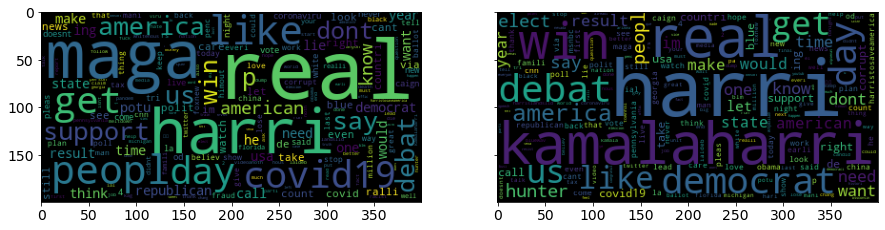

In [29]:
#Wordcloud to visualize most frequent words in tweets

wordcloud_trump = WordCloud().generate_from_frequencies(fdist_trump)
wordcloud_biden = WordCloud().generate_from_frequencies(fdist_biden)

fig, axs = plt.subplots(1, 2)
(ax1, ax2) = axs
# fig.suptitle('Visualization for most frequent words')

ax1.imshow(wordcloud_trump)
ax2.imshow(wordcloud_biden)

for ax in axs.flat:
    ax.label_outer()


fig.set_size_inches(15, 30)

The Left picture represents the most frequent 20 words in Trump dataset, and the right picture represents the most 20 frequent 20 words in Biden dataset.

We can see that `covid19`, as a keyword, shows up in `Trump` dataset. So we assume that people tweets with a `Trump` hashtag pay attentions to the Covid-19 pandemic, we then begin to analyze the relationship between the sentiment and the keyword `covid` or `covid19`.

In [30]:
# sort the words by their frequency in descending order
sorted_trump = {k: v for k, v in sorted(fdist_trump.items(), key=lambda item: item[1], reverse=True)}
sorted_biden = {k: v for k, v in sorted(fdist_biden.items(), key=lambda item: item[1], reverse=True)}
# get top 20 most frequently used words
first20_trump = {k: sorted_trump[k] for k in list(sorted_trump)[:20]}
first20_biden = {k: sorted_biden[k] for k in list(sorted_biden)[:20]}

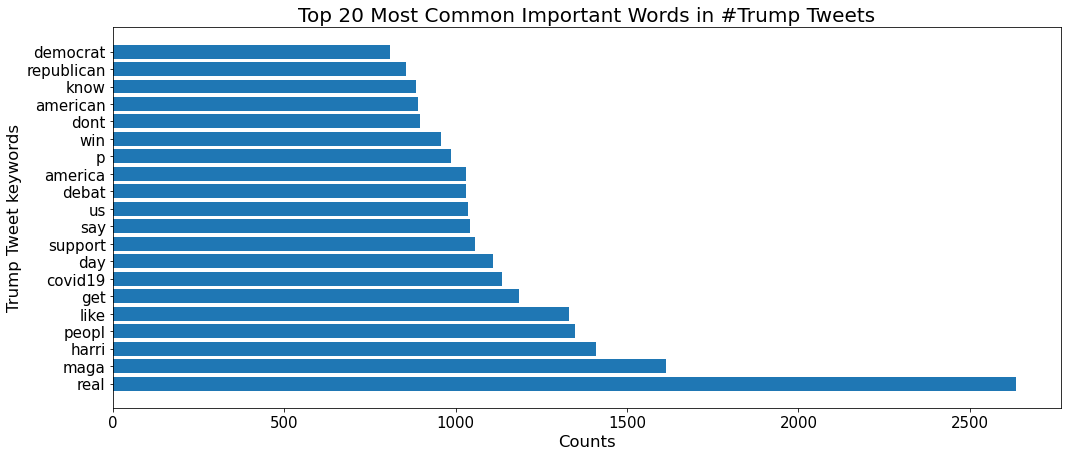

<Figure size 1080x576 with 0 Axes>

In [31]:
# plot of top 20 most common words in reviews
# <TODO> Two graph in a comparison way
plt.barh(list(first20_trump.keys()), list(first20_trump.values()))
sns.set(rc={'figure.figsize':(8, 7)}, style = 'white')
plt.ylabel('Trump Tweet keywords', fontsize = 16.5)
plt.xlabel('Counts', fontsize = 16.5)
plt.title('Top 20 Most Common Important Words in #Trump Tweets', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.figure(figsize=(15, 8))
plt.show()

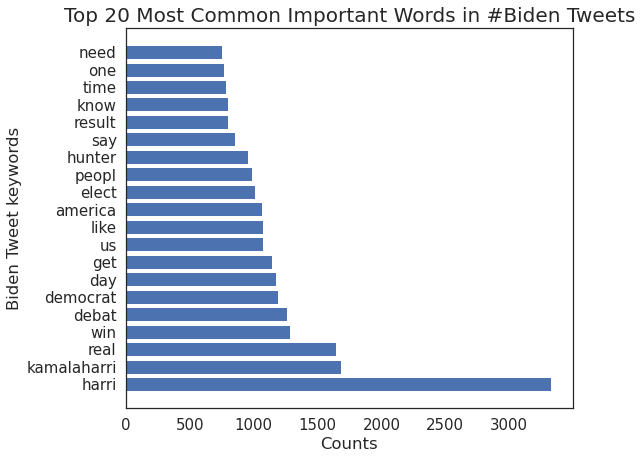

<Figure size 1080x576 with 0 Axes>

In [32]:
plt.barh(list(first20_biden.keys()), list(first20_biden.values()))
sns.set(rc={'figure.figsize':(8, 7)}, style = 'white')
plt.ylabel('Biden Tweet keywords', fontsize = 16.5)
plt.xlabel('Counts', fontsize = 16.5)
plt.title('Top 20 Most Common Important Words in #Biden Tweets', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.figure(figsize=(15, 8))
plt.show()

As we can see, the top 20 most frequent words in #Trump and #Biden Tweets are very similar("us", "american", "people"). These are common words that people will express during election. However, there's one word that stand out particularly in `#Trump` tweets that `#Biden` doesn't have: `Covid-19`.

### Finding `Covid-19` keyword in datasets

Before jump into the analysis, we need to firstly do some data cleanings of the `created_at` column, which represents the time that the user send a tweet.

In [33]:
trump_usa_df['created_at'] = pd.to_datetime(trump_usa_df['created_at']).dt.date
biden_usa_df['created_at'] = pd.to_datetime(biden_usa_df['created_at']).dt.date

In [34]:
trump_usa_df["Date,Month"] = trump_usa_df["created_at"].apply(lambda x: str(x.day)+','+str(x.month) )
biden_usa_df["Date,Month"] = biden_usa_df["created_at"].apply(lambda x: str(x.day)+','+str(x.month) )
trump_usa_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop,tweet_nostop_stem,"Date,Month"
0,2020-10-23,pattyarquette megynkelly aka very smart perso...,1.319655e+18,CA,"[pattyarquette, megynkelly, aka, very, smart, ...","[pattyarquette, megynkelly, aka, smart, person...","[pattyarquett, megynkelli, aka, smart, person,...","23,10"
1,2020-11-03,\n\nthe new is \n or \n\nharristoendthisnig...,1.323763e+18,NaN,"[the, new, is, or, harristoendthisnightmare, h...","[new, harristoendthisnightmare, harris, elecci...","[new, harristoendthisnightmar, harri, eleccion...","3,11"
2,2020-10-21,elecciones el audiovisual cuenta con un tema ...,1.318995e+18,FL,"[elecciones, el, audiovisual, cuenta, con, un,...","[elecciones, el, audiovisual, cuenta, con, un,...","[eleccion, el, audiovisu, cuenta, con, un, tem...","21,10"
3,2020-10-20,well looks like you will have actually let peo...,1.318366e+18,PR,"[well, looks, like, you, will, have, actually,...","[well, looks, like, actually, let, people, tim...","[well, look, like, actual, let, peopl, time, p...","20,10"
4,2020-10-27,i actually am humble im the most humble out o...,1.321160e+18,NaN,"[i, actually, am, humble, im, the, most, humbl...","[actually, humble, im, humble, humblers, humbl...","[actual, humbl, im, humbl, humbler, humbl, lik...","27,10"


In [35]:
# Creating a column to see if covid are mentioned in the
# tweet's text.
watch_words = ["covid19", "covid"]

In [36]:
def whether_covid_in(tweet, word_list = watch_words):

    for i in tweet.split():
        if i.lower() in word_list:
            return True
    return False

In [37]:
trump_usa_df['covid19_true_false'] = trump_usa_df['tweet'].apply(lambda x: whether_covid_in(x, watch_words))
biden_usa_df['covid19_true_false'] = biden_usa_df['tweet'].apply(lambda x: whether_covid_in(x, watch_words))
trump_usa_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop,tweet_nostop_stem,"Date,Month",covid19_true_false
0,2020-10-23,pattyarquette megynkelly aka very smart perso...,1.319655e+18,CA,"[pattyarquette, megynkelly, aka, very, smart, ...","[pattyarquette, megynkelly, aka, smart, person...","[pattyarquett, megynkelli, aka, smart, person,...","23,10",False
1,2020-11-03,\n\nthe new is \n or \n\nharristoendthisnig...,1.323763e+18,NaN,"[the, new, is, or, harristoendthisnightmare, h...","[new, harristoendthisnightmare, harris, elecci...","[new, harristoendthisnightmar, harri, eleccion...","3,11",False
2,2020-10-21,elecciones el audiovisual cuenta con un tema ...,1.318995e+18,FL,"[elecciones, el, audiovisual, cuenta, con, un,...","[elecciones, el, audiovisual, cuenta, con, un,...","[eleccion, el, audiovisu, cuenta, con, un, tem...","21,10",False
3,2020-10-20,well looks like you will have actually let peo...,1.318366e+18,PR,"[well, looks, like, you, will, have, actually,...","[well, looks, like, actually, let, people, tim...","[well, look, like, actual, let, peopl, time, p...","20,10",False
4,2020-10-27,i actually am humble im the most humble out o...,1.321160e+18,NaN,"[i, actually, am, humble, im, the, most, humbl...","[actually, humble, im, humble, humblers, humbl...","[actual, humbl, im, humbl, humbler, humbl, lik...","27,10",False


In [38]:
trump_covid_df = trump_usa_df[trump_usa_df["covid19_true_false"] == True]
biden_covid_df = biden_usa_df[biden_usa_df["covid19_true_false"] == True]
trump_covid_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop,tweet_nostop_stem,"Date,Month",covid19_true_false
8,2020-10-30,falsely tells michigan rally our doctors get ...,1.322303e+18,DC,"[falsely, tells, michigan, rally, our, doctors...","[falsely, tells, michigan, rally, doctors, get...","[fals, tell, michigan, ralli, doctor, get, mon...","30,10",True
58,2020-10-25,by his narcisstic logic he is telling himself ...,1.320212e+18,WA,"[by, his, narcisstic, logic, he, is, telling, ...","[narcisstic, logic, telling, didnt, kill, thou...","[narcisst, logic, tell, didnt, kill, thousand,...","25,10",True
99,2020-10-15,chances of the republicans retaining senate ar...,1.316823e+18,CO,"[chances, of, the, republicans, retaining, sen...","[chances, republicans, retaining, senate, 13, ...","[chanc, republican, retain, senat, 13, sinc, c...","15,10",True
110,2020-10-23,cnn ddale8 this fact⤵can never be fortten\n\n ...,1.319522e+18,AZ,"[cnn, ddale8, this, fact⤵can, never, be, fortt...","[cnn, ddale8, fact⤵can, never, fortten, choice...","[cnn, ddale8, fact⤵can, never, fortten, choic,...","23,10",True
112,2020-11-02,firing dranthonyf will have no affect whatsoev...,1.323142e+18,OR,"[firing, dranthonyf, will, have, no, affect, w...","[firing, dranthonyf, affect, whatsoever, still...","[fire, dranthonyf, affect, whatsoev, still, gu...","2,11",True


In [39]:
print("number of tweets contains covid in #trump tweets is", trump_covid_df.shape[0])
print("number of tweets contains covid in #biden tweets is", biden_covid_df.shape[0])

number of tweets contains covid in #trump tweets is 1423
number of tweets contains covid in #biden tweets is 749


We can see that the tweets contained `#Trump` hashtag are roughly two times larger than the tweets contained `#Biden` hashtag.

### Sentiment Analysis

In [40]:
analyser = SentimentIntensityAnalyzer()

# get list of the 'sentences' (responses) from each individual
trump_list = list(trump_usa_df['tweet'].values)
biden_list = list(biden_usa_df['tweet'].values)

In [41]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [42]:
# get sentiment measures
trump_sentiments = get_sentiments(trump_list)
biden_sentiments = get_sentiments(biden_list)

In [43]:
trump_usa_df['compound'] = trump_sentiments['compound']
trump_usa_df['neg'] = trump_sentiments['neg']
trump_usa_df['neu'] = trump_sentiments['neu']
trump_usa_df['pos'] = trump_sentiments['pos']

biden_usa_df['compound'] = biden_sentiments['compound']
biden_usa_df['neg'] = biden_sentiments['neg']
biden_usa_df['neu'] = biden_sentiments['neu']
biden_usa_df['pos'] = biden_sentiments['pos']

In [44]:
biden_sentiments.describe()

,compound,neg,neu,pos
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.065076,0.073196,0.821844,0.104160
std,0.455478,0.114866,0.169279,0.138784
min,-0.988900,0.000000,0.000000,0.000000
25%,-0.177900,0.000000,0.714000,0.000000
50%,0.000000,0.000000,0.839000,0.045000
75%,0.421500,0.125000,1.000000,0.174000
max,0.986000,1.000000,1.000000,1.000000


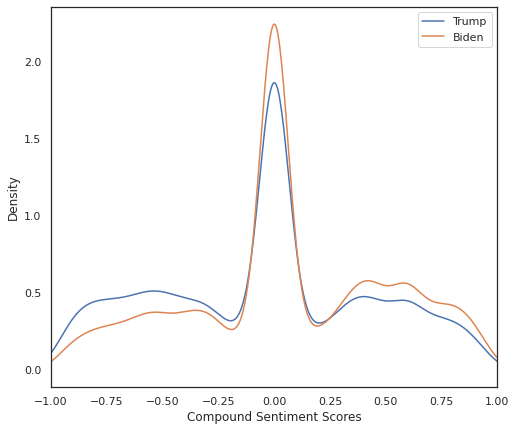

In [45]:
trump_sentiments['compound'].plot.density(label='Trump')
biden_sentiments['compound'].plot.density(label='Biden')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

We can see that the shape of the sentiment analysis of Trump and Biden datasets are roughly the same.

However, we can see a slightly large portion of `#Biden` users are possibly tend to be more neutral compared to the `#Trump` users. 

There are possibly more people that perform a positive sentiment of `#Biden` users than `#Trump` users, and possibly more people perform a negative sentiment of of `#Biden` users than `#Trump` users.

In [46]:
# include label for boxplot
trump_sentiments['which'] = 'Trump'
biden_sentiments['which'] = 'Biden'
# concatenate data frames together
compound_out = pd.concat([trump_sentiments, biden_sentiments])
compound_out.head()

,compound,neg,neu,pos,sentence,which
0,0.4576,0.000,0.800,0.200,pattyarquette megynkelly aka very smart perso...,Trump
1,0.0000,0.000,1.000,0.000,\n\nthe new is \n or \n\nharristoendthisnig...,Trump
2,0.0000,0.000,1.000,0.000,elecciones el audiovisual cuenta con un tema ...,Trump
3,0.4939,0.134,0.645,0.220,well looks like you will have actually let peo...,Trump
4,0.3612,0.000,0.889,0.111,i actually am humble im the most humble out o...,Trump


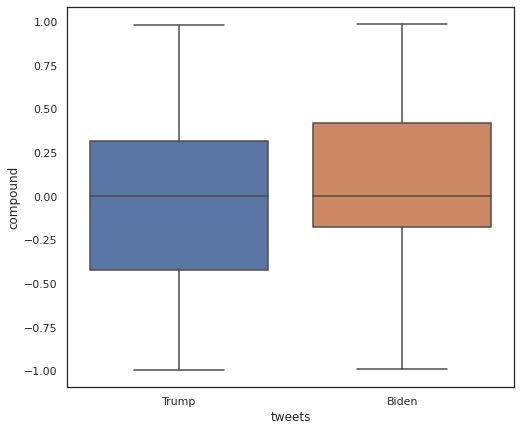

In [47]:
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('tweets');

Now we do the same process for the covid only dataset and try to see if covid-19 has an impact in people's sentiments towards election.

In [48]:
trump_sentiments['state_code'] = trump_usa_df['state_code'].values
biden_sentiments['state_code'] = biden_usa_df['state_code'].values

trump_state_compound = trump_sentiments.groupby("state_code",as_index=False).mean()
biden_state_compound = biden_sentiments.groupby("state_code",as_index=False).mean()



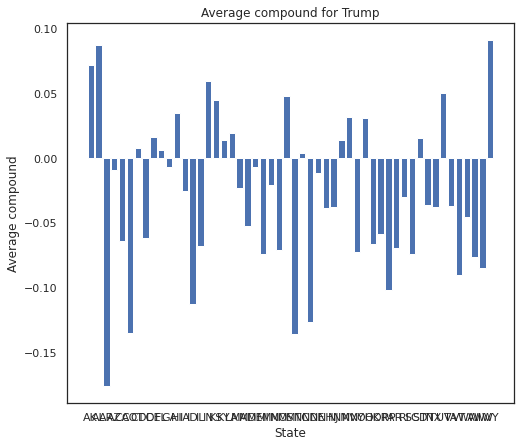

In [49]:
y_pos = np.arange(len(trump_state_compound['state_code'] ))

plt.bar(y_pos, trump_state_compound['compound'])
 
plt.xticks(y_pos, trump_state_compound['state_code'] )

plt.ylabel('Average compound')
plt.xlabel('State')
plt.title('Average compound for Trump')

plt.show()

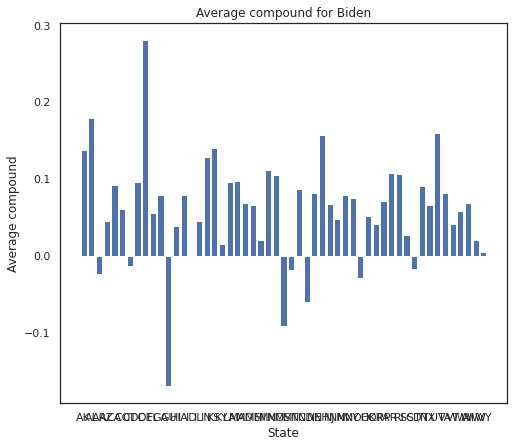

In [50]:
y_pos = np.arange(len(biden_state_compound['state_code'] ))

plt.bar(y_pos, biden_state_compound['compound'])
 
plt.xticks(y_pos, biden_state_compound['state_code'] )

plt.ylabel('Average compound')
plt.xlabel('State')
plt.title('Average compound for Biden')
plt.show()

In [51]:
# get list of the 'sentences' (responses) from each individual
trump_covid_list = list(trump_covid_df['tweet'].values)
biden_covid_list = list(biden_covid_df['tweet'].values)

In [52]:
trump_covid_sentiments = get_sentiments(trump_covid_list)
biden_covid_sentiments = get_sentiments(biden_covid_list)

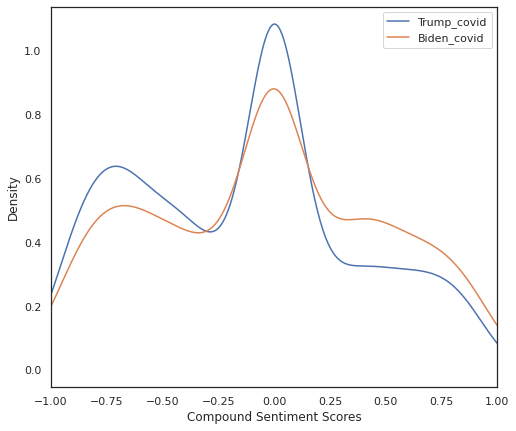

In [53]:
trump_covid_sentiments['compound'].plot.density(label='Trump_covid')
biden_covid_sentiments['compound'].plot.density(label='Biden_covid')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

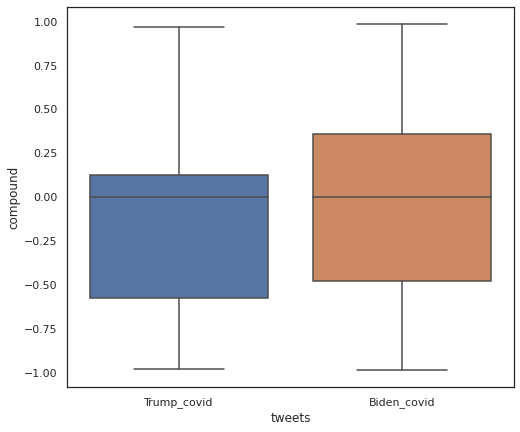

In [54]:
# include label for boxplot
trump_covid_sentiments['which'] = 'Trump_covid'
biden_covid_sentiments['which'] = 'Biden_covid'
# concatenate data frames together
compound_out = pd.concat([trump_covid_sentiments, biden_covid_sentiments])
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('tweets');

In [55]:
trump_covid_sentiments['state_code'] = trump_covid_df['state_code'].values
biden_covid_sentiments['state_code'] = biden_covid_df['state_code'].values

trump_covid_state_compound = trump_covid_sentiments.groupby("state_code",as_index=False).mean()
biden_covid_state_compound = biden_covid_sentiments.groupby("state_code",as_index=False).mean()


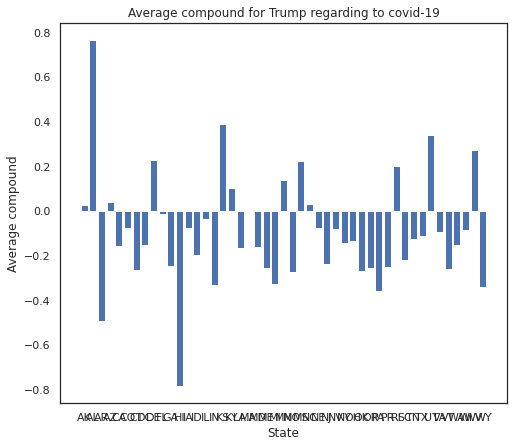

In [56]:
y_pos = np.arange(len(trump_covid_state_compound['state_code'] ))

plt.bar(y_pos, trump_covid_state_compound['compound'])
 
plt.xticks(y_pos, trump_covid_state_compound['state_code'] )

plt.ylabel('Average compound')
plt.xlabel('State')
plt.title('Average compound for Trump regarding to covid-19')

plt.show()

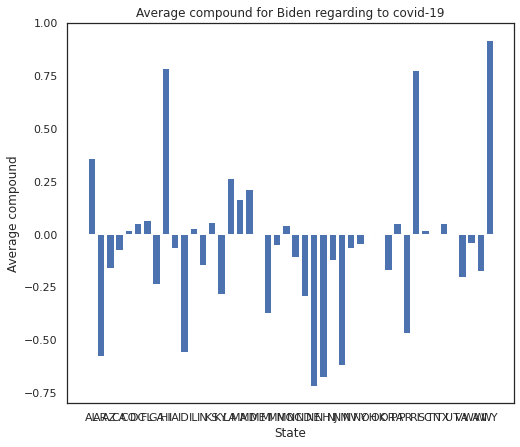

In [57]:
y_pos = np.arange(len(biden_covid_state_compound['state_code'] ))

plt.bar(y_pos, biden_covid_state_compound['compound'])
 
plt.xticks(y_pos, biden_covid_state_compound['state_code'] )

plt.ylabel('Average compound')
plt.xlabel('State')
plt.title('Average compound for Biden regarding to covid-19')

plt.show()

In [58]:
trump_covid_df['compound'] = trump_covid_sentiments['compound']
trump_covid_df['neg'] = trump_covid_sentiments['neg']
trump_covid_df['neu'] = trump_covid_sentiments['neu']
trump_covid_df['pos'] = trump_covid_sentiments['pos']

biden_covid_df['compound'] = biden_covid_sentiments['compound']
biden_covid_df['neg'] = biden_covid_sentiments['neg']
biden_covid_df['neu'] = biden_covid_sentiments['neu']
biden_covid_df['pos'] = biden_covid_sentiments['pos']

In [59]:
# only look at the negative tweets
trump_usa_df['neg'].describe()

count    20000.000000
mean         0.102983
std          0.131762
min          0.000000
25%          0.000000
50%          0.056000
75%          0.174000
max          1.000000
Name: neg, dtype: float64

In [60]:
trump_covid_df['neg'].describe()

count    107.000000
mean       0.106589
std        0.126614
min        0.000000
25%        0.000000
50%        0.069000
75%        0.197000
max        0.565000
Name: neg, dtype: float64

In [61]:
biden_usa_df['neg'].describe()

count    20000.000000
mean         0.073196
std          0.114866
min          0.000000
25%          0.000000
50%          0.000000
75%          0.125000
max          1.000000
Name: neg, dtype: float64

In [62]:
biden_covid_df['neg'].describe()

count    29.000000
mean      0.092862
std       0.103059
min       0.000000
25%       0.000000
50%       0.048000
75%       0.167000
max       0.358000
Name: neg, dtype: float64

- mean of trump higher in both
- trump has more negative tweets related to covid

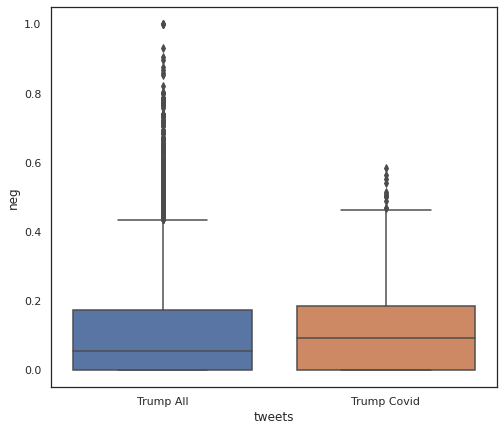

In [63]:
# concatenate data frames together
trump_sentiments['which'] = 'Trump All'
trump_covid_sentiments['which'] = 'Trump Covid'
compound_out = pd.concat([trump_sentiments, trump_covid_sentiments])
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='neg')
plt.xlabel('tweets');

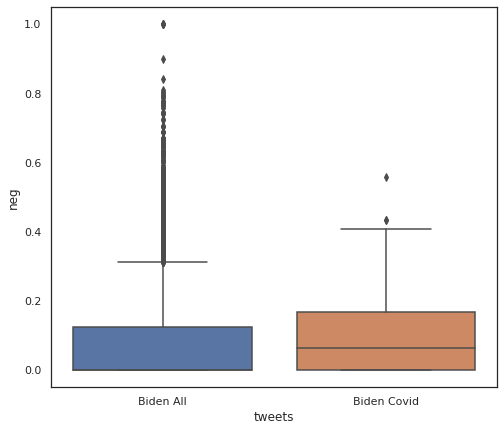

In [64]:
# concatenate data frames together
biden_sentiments['which'] = 'Biden All'
biden_covid_sentiments['which'] = 'Biden Covid'
compound_out = pd.concat([biden_sentiments, biden_covid_sentiments])
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='neg')
plt.xlabel('tweets');

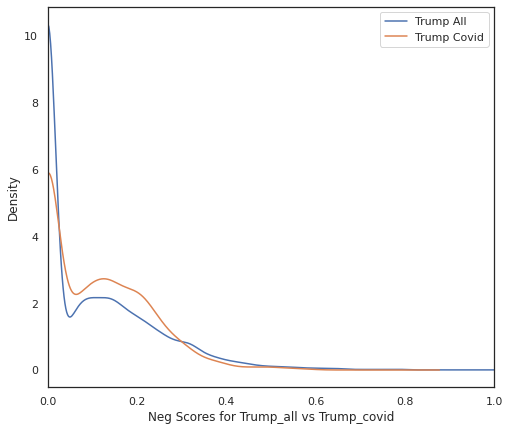

In [65]:
trump_sentiments['neg'].plot.density(label='Trump All')
trump_covid_sentiments['neg'].plot.density(label='Trump Covid')
plt.legend()
plt.xlabel('Neg Scores for Trump_all vs Trump_covid')
plt.xlim(0,1);

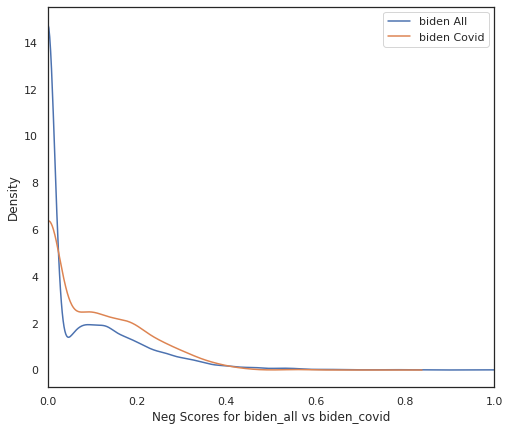

In [66]:
biden_sentiments['neg'].plot.density(label='biden All')
biden_covid_sentiments['neg'].plot.density(label='biden Covid')
plt.legend()
plt.xlabel('Neg Scores for biden_all vs biden_covid')
plt.xlim(0,1);

In [67]:
trump_covid_df.head()

,created_at,tweet,tweet_id,state_code,tweet_token,tweet_nostop,tweet_nostop_stem,"Date,Month",covid19_true_false,compound,neg,neu,pos
8,2020-10-30,falsely tells michigan rally our doctors get ...,1.322303e+18,DC,"[falsely, tells, michigan, rally, our, doctors...","[falsely, tells, michigan, rally, doctors, get...","[fals, tell, michigan, ralli, doctor, get, mon...","30,10",True,0.2960,0.000,0.732,0.268
58,2020-10-25,by his narcisstic logic he is telling himself ...,1.320212e+18,WA,"[by, his, narcisstic, logic, he, is, telling, ...","[narcisstic, logic, telling, didnt, kill, thou...","[narcisst, logic, tell, didnt, kill, thousand,...","25,10",True,0.1280,0.167,0.684,0.148
99,2020-10-15,chances of the republicans retaining senate ar...,1.316823e+18,CO,"[chances, of, the, republicans, retaining, sen...","[chances, republicans, retaining, senate, 13, ...","[chanc, republican, retain, senat, 13, sinc, c...","15,10",True,0.0000,0.000,1.000,0.000
110,2020-10-23,cnn ddale8 this fact⤵can never be fortten\n\n ...,1.319522e+18,AZ,"[cnn, ddale8, this, fact⤵can, never, be, fortt...","[cnn, ddale8, fact⤵can, never, fortten, choice...","[cnn, ddale8, fact⤵can, never, fortten, choic,...","23,10",True,-0.8834,0.263,0.672,0.065
112,2020-11-02,firing dranthonyf will have no affect whatsoev...,1.323142e+18,OR,"[firing, dranthonyf, will, have, no, affect, w...","[firing, dranthonyf, affect, whatsoever, still...","[fire, dranthonyf, affect, whatsoev, still, gu...","2,11",True,-0.3321,0.228,0.589,0.183


In [68]:
trump_usa_df = trump_usa_df.drop(columns = ['tweet','tweet_token','tweet_nostop','tweet_nostop_stem','covid19_true_false'])
trump_covid_df = trump_covid_df.drop(columns = ['tweet','tweet_token','tweet_nostop','tweet_nostop_stem','covid19_true_false'])

In [69]:
biden_usa_df = biden_usa_df.drop(columns = ['tweet','tweet_token','tweet_nostop','tweet_nostop_stem','covid19_true_false'])
biden_covid_df = biden_covid_df.drop(columns = ['tweet','tweet_token','tweet_nostop','tweet_nostop_stem','covid19_true_false'])

In [70]:
# get number of covid tweets
trump_covid_df_countbydate = trump_covid_df.groupby("Date,Month").count()[["tweet_id"]].rename({"tweet_id":"Covid_Tweet_Count"}, axis = 1)
biden_covid_df_countbydate = biden_covid_df.groupby("Date,Month").count()[["tweet_id"]].rename({"tweet_id":"Covid_Tweet_Count"}, axis = 1)

In [71]:
trump_covid_df_countbydate.head()

,Covid_Tweet_Count
"Date,Month",
"1,11",49
"15,10",65
"16,10",50
"17,10",46
"18,10",40


In [72]:
trump_usa_df_bydate = trump_usa_df.groupby("Date,Month")
biden_usa_df_bydate = biden_usa_df.groupby("Date,Month")
trump_covid_df_bydate = trump_covid_df.groupby("Date,Month")
biden_covid_df_bydate = biden_covid_df.groupby("Date,Month")

In [73]:
trump_usa_daily_averages = trump_usa_df_bydate.aggregate({"neu":np.mean})
biden_usa_daily_averages = biden_usa_df_bydate.aggregate({"neu":np.mean})
trump_covid_daily_averages = trump_covid_df_bydate.aggregate({"neg":np.mean})
biden_covid_daily_averages = biden_covid_df_bydate.aggregate({"neg":np.mean})

In [74]:
trump_usa_daily_averages['pos'] = trump_usa_df_bydate.aggregate({"pos":np.mean})['pos']
trump_usa_daily_averages['neg'] = trump_usa_df_bydate.aggregate({"neg":np.mean})['neg']
trump_usa_daily_averages['compound'] = trump_usa_df_bydate.aggregate({"compound":np.mean})['compound']


trump_covid_daily_averages['Covid_Tweet_Count'] = trump_covid_df_countbydate['Covid_Tweet_Count']

biden_usa_daily_averages['pos'] = biden_usa_df_bydate.aggregate({"pos":np.mean})['pos']
biden_usa_daily_averages['neg'] = biden_usa_df_bydate.aggregate({"neg":np.mean})['neg']
biden_usa_daily_averages['compound'] = biden_usa_df_bydate.aggregate({"compound":np.mean})['compound']


biden_covid_daily_averages['Covid_Tweet_Count'] = biden_covid_df_countbydate['Covid_Tweet_Count']

In [75]:
trump_covid_daily_averages.head()

,neg,Covid_Tweet_Count
"Date,Month",,
"1,11",0.23000,49
"15,10",0.13820,65
"16,10",0.10700,50
"17,10",0.27100,46
"18,10",0.14375,40


In [76]:
biden_covid_daily_averages = biden_covid_daily_averages.rename(columns={"neg": "Covid_neg"})
trump_covid_daily_averages = trump_covid_daily_averages.rename(columns={"neg": "Covid_neg"})

In [77]:
trump_final = trump_usa_daily_averages.join(trump_covid_daily_averages, how='inner')
biden_final = biden_usa_daily_averages.join(biden_covid_daily_averages, how='inner')

In [78]:
trump_final.head()

,neu,pos,neg,compound,Covid_neg,Covid_Tweet_Count
"Date,Month",,,,,,
"1,11",0.805642,0.092130,0.102243,-0.039813,0.23000,49
"15,10",0.802267,0.079232,0.118501,-0.140328,0.13820,65
"16,10",0.795751,0.092916,0.111328,-0.040532,0.10700,50
"17,10",0.794577,0.085627,0.119806,-0.097090,0.27100,46
"18,10",0.804175,0.089704,0.106118,-0.071325,0.14375,40


## Data Analysis

In [79]:
ttest_ind(trump_final.dropna()['neg'], biden_final.dropna()['neg'])

# no difference

Ttest_indResult(statistic=10.093351701265734, pvalue=1.1163112660869977e-12)

In [80]:
# ttest
ttest_ind(trump_final.dropna()['Covid_neg'], biden_final.dropna()['Covid_neg'])

# no difference

Ttest_indResult(statistic=1.9608234400213513, pvalue=0.05671689864714251)

In [81]:
# ttest
ttest_ind(trump_final.dropna()['Covid_Tweet_Count'], biden_final.dropna()['Covid_Tweet_Count'])

# no difference

Ttest_indResult(statistic=5.98892912250915, pvalue=4.4863953260252876e-07)

Whether the number of covid tweet and the negative sentiment in the tweet has a effect on people's overall negative sentiment towards Trump/Biden

In [82]:
# Trump w/neg
model_trump = smf.ols(formula="neg ~ Covid_Tweet_Count + Covid_neg", data=trump_final)
res_trump = model_trump.fit()
print(res_trump.summary())

                            OLS Regression Results                            
Dep. Variable:                    neg   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.5023
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.612
Time:                        23:47:53   Log-Likelihood:                 84.717
No. Observations:                  25   AIC:                            -163.4
Df Residuals:                      22   BIC:                            -159.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1105      0.00

H0: Coefficient on Covid_Tweet_Count/Covid_neg = 0
<br>
H1: Coefficient on Covid_Tweet_Count/Covid_neg != 0
<br>
Significance Level: 5%

In [83]:
# Biden w/neg
model_biden = smf.ols(formula="neg ~ Covid_Tweet_Count + Covid_neg", data=biden_final)
res_biden = model_biden.fit()
print(res_biden.summary())

                            OLS Regression Results                            
Dep. Variable:                    neg   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.099
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.359
Time:                        23:47:53   Log-Likelihood:                 59.643
No. Observations:                  18   AIC:                            -113.3
Df Residuals:                      15   BIC:                            -110.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0843      0.00

Same as Trump's Regresssion test:

H0: Coefficient on Covid_Tweet_Count/Covid_neg = 0
<br>
H1: Coefficient on Covid_Tweet_Count/Covid_neg != 0
<br>
Significance Level: 5%

In [84]:
# Trump
model_trump = smf.ols(formula="compound ~ Covid_Tweet_Count + Covid_neg", data=trump_final)
res_trump = model_trump.fit()
print(res_trump.summary())

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.5222
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.600
Time:                        23:47:53   Log-Likelihood:                 49.960
No. Observations:                  25   AIC:                            -93.92
Df Residuals:                      22   BIC:                            -90.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0803      0.03

In [85]:
# Biden
model_biden = smf.ols(formula="compound ~ Covid_Tweet_Count + Covid_neg", data=biden_final)
res_biden = model_biden.fit()
print(res_biden.summary())

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.213
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.144
Time:                        23:47:53   Log-Likelihood:                 27.796
No. Observations:                  18   AIC:                            -49.59
Df Residuals:                      15   BIC:                            -46.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0331      0.03

## Ethics and Privacy
All of the datasets used in this project are available on the public website kaggle.com, therefore we have the permission to use these two datasets for research purposes. 
<br>

Since the original dataset was collected using Twitter API by kaggle user Manch Hui, all user made public personal data were also collected. For privacy concerns, we have deleted all potential data that could reveal the user's identity including user_username, user_id, join_date, city, longitude, latitude, user_description, and etc. Additionally, because our data draws from a broad range of tweets, we can avoid violating the privacy of any particular individual. Therefore, with the measure we implemented to anonymize the data, we believe we have minimized the risk of any potential personal privacy issues and all aspects of our project should have no privacy concerns. 
<br>

In terms of bias in our project, we cannot guarantee there is no bias in our dataset since twitter is an open platform with the simplest registration process, which means all people can register several accounts to publicize his opinion regarding the president candidates. We have implemented several methods to minimize the influence of biased data. For example, we have randomly selected 50000 out of 200000 data in each dataset and we have only selected the user region to the U.S only to avoid the biased opinions from regions other than U.S. We assumed that potential bias in our data was much lower with our measurement. 
<br>

In terms of the impact of our analysis, our original intention of doing this project is to seek finding any correlation between the 2020 election results and public’s feeling of the countermeaurements to the pandemic by the current administration. In addition, our research project did not make any predictions to the election or future election results. Therefore, there should not be any worries of improper use of our research conclusion.


## Conclusion & Discussion
In this project, we intended to find out whether the general public’s negative sentiment towards COVID-19 pandemic affects the overall reputation of presidential candidates in the 2020 presidential election. To answer this question, we looked at data only from the United States. 

From the Barplot comparison, we noticed that the average negative sentiment ratings related to Trump in each state are much higher than the negative sentiment rating related to Biden, which is consistent with our original prediction. However, when we only isolated the covid-19 related tweets for both presidential candidates, Trump and Biden both have a high level of negative sentiment tweet across a lot of states. We cannot conclude this result is consistent with our original hypothesis. 

From the t-test comparison, we observed that the p-value for all ‘neg’, ‘compound’ and ‘pos’ sentiments are larger than 0.05, hence we cannot detect a correlation for the total tweet count and the negative sentiment score for #Trump and #Biden.

One limitation we encountered in our analysis was the size of the datasets. There are nearly one million tweets contain the #Trump hashtag and almost 800 thousands tweets that have #Biden hashtag. Therefore, we had to take a sample from both datasets, which makes our data less representative of the entire population.

## Team Contribution

- Yichen Huang: Background & Prior Work, EDA, Conclusion & Discussion
- Hong Tang: Background & Prior Work, EDA, some visualizations, Ethics & Privacy
- Rita Wan: EDA, some visualizations, Conclusion & Discussion
- Chaolun Cai: Data analysis and results section, EDA, Conclusion & Discussion
- Angie Long: Background & Prior Work, Ethics & Privacy